# **Hand Written Digit Prediction**

**Data Collection:** Using a dataset, such as MNIST, which contains thousands of labeled images of handwritten digits.

**Preprocessing:**Preparing the data by normalizing pixel values, resizing images, or applying data augmentation techniques to improve model robustness.

**Model Development**: Choosing and training a machine learning or deep learning model (e.g., convolutional neural networks) to learn the features of the handwritten digits.

**Evaluation:** Testing the model on a separate validation set to assess its accuracy and performance metrics.

**Deployment:** Implementing the trained model in a suitable environment where it can classify new handwritten digit inputs.

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

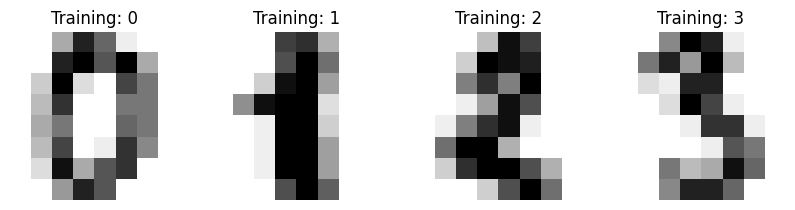

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# **Data Preprocessing**


In [7]:
df .images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data=data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [24]:
from re import X
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred = rf.predict(X_test)

# **Predict Test Data**

In [29]:
y_pred

array([5, 2, 9, 5, 8, 6, 3, 0, 5, 9, 5, 7, 3, 1, 6, 2, 2, 9, 8, 8, 9, 6,
       2, 2, 7, 3, 0, 9, 8, 9, 9, 0, 4, 0, 6, 8, 1, 6, 8, 6, 4, 5, 3, 2,
       2, 5, 4, 6, 7, 0, 5, 3, 5, 8, 0, 1, 9, 0, 3, 1, 6, 7, 6, 0, 2, 9,
       4, 7, 8, 4, 6, 2, 9, 8, 0, 4, 3, 4, 4, 8, 5, 5, 2, 4, 4, 6, 5, 4,
       2, 9, 4, 2, 8, 1, 5, 6, 3, 2, 5, 0, 5, 2, 0, 7, 9, 9, 7, 5, 9, 2,
       1, 9, 3, 6, 8, 1, 5, 7, 6, 3, 1, 7, 7, 4, 2, 0, 8, 5, 6, 6, 3, 8,
       1, 2, 8, 4, 2, 5, 5, 0, 4, 8, 5, 6, 8, 7, 8, 3, 2, 6, 8, 8, 2, 6,
       0, 6, 7, 9, 1, 2, 5, 4, 1, 4, 7, 9, 9, 6, 6, 7, 3, 8, 2, 1, 1, 8,
       7, 9, 2, 3, 9, 2, 6, 2, 8, 7, 3, 7, 7, 1, 6, 3, 0, 7, 1, 4, 6, 7,
       2, 4, 8, 1, 7, 5, 0, 7, 6, 5, 9, 5, 1, 0, 3, 0, 2, 1, 4, 1, 9, 4,
       8, 5, 3, 9, 2, 9, 2, 5, 2, 2, 5, 2, 2, 0, 1, 6, 6, 1, 9, 5, 9, 7,
       9, 6, 5, 9, 1, 2, 5, 0, 7, 3, 0, 1, 7, 5, 2, 8, 1, 3, 9, 2, 6, 8,
       5, 9, 9, 6, 4, 9, 1, 2, 1, 2, 4, 7, 1, 2, 7, 3, 6, 2, 5, 3, 3, 4,
       4, 3, 3, 5, 9, 3, 8, 4, 7, 8, 0, 5, 5, 8, 5,

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
confusion_matrix(y_test,y_pred)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 73,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 60,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 50,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 51]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        73
           3       0.98      0.98      0.98        52
           4       0.98      0.98      0.98        43
           5       0.98      0.95      0.97        63
           6       1.00      0.98      0.99        57
           7       0.98      1.00      0.99        52
           8       0.93      0.98      0.95        51
           9       0.96      0.94      0.95        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        73
           3       0.98      0.98      0.98        52
           4       0.98      0.98      0.98        43
           5       0.98      0.95      0.97        63
           6       1.00      0.98      0.99        57
           7       0.98      1.00      0.99        52
           8       0.93      0.98      0.95        51
           9       0.96      0.94      0.95        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# **Explanation**

 Develop a model to accurately classify handwritten digits (0-9) using image data.

**Data Collection:** Utilized the MNIST dataset, which consists of 1,797 labeled images of handwritten digits.

**Data Preprocessing:**

Reshaped images from (8, 8) pixels to (64,) for processing.
Normalized pixel values to a range of [0, 1] by dividing by 16.
Train-Test Split: Divided the data into training (70%) and testing (30%) sets using train_test_split.

**Model Development:**

Implemented a Random Forest Classifier.
Trained the model on the training dataset.
Prediction: Made predictions on the test dataset using the trained model.

**Evaluation:**

Confusion Matrix: Visualized performance across digit classes, showing high accuracy.
Classification Report: Reported precision, recall, and F1-scores for each digit, with an overall accuracy of 98%.
Key Metrics:
Accuracy: 98%
Macro Avg: Precision, recall, and F1-score all around 0.98.
This process successfully demonstrates the capability of the Random Forest model in recognizing and classifying handwritten digits.